In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.insert(1, '../utils/')

from utils.deafrica_datahandling import load_ard, mostcommon_crs
from utils.deafrica_plotting import rgb
from utils.deafrica_bandindices import calculate_indices
from odc.ui import with_ui_cbk

In [2]:
dc = datacube.Datacube(app='Sentinel-2')

In [3]:
lat, lon = 42.86, -2.6
buffer = 0.125

# Create a reusable query
query = {
    'x': (lon-buffer, lon+buffer),
    'y': (lat+buffer, lat-buffer),
    'time': ('2022-01-01', '2022-01-31'),
    'resolution': (-30, 30)
}

# Identify the most common projection system in the input query
output_crs = mostcommon_crs(dc=dc, product='s2_l2a', query=query)

# Load available data from Sentinel-2 and filter to retain only times
# with at least 90% good data
ds = load_ard(dc=dc, 
              products=['s2_l2a'],
              min_gooddata=0.9, 
              measurements=['red', 'green', 'blue', 'swir_1', 'swir_2', 'nir', 'nir_2'],
              output_crs=output_crs,
              progress_cbk=with_ui_cbk(),
              **query)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 6 out of 13 time steps with at least 90.0% good quality pixels
Applying pixel quality/cloud mask
Loading 6 time steps


In [4]:
print(ds)

<xarray.Dataset>
Dimensions:      (time: 6, y: 929, x: 686)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T11:19:11 ... 2022-01-26T11:...
  * y            (y) float64 4.759e+06 4.759e+06 ... 4.731e+06 4.731e+06
  * x            (x) float64 5.224e+05 5.225e+05 5.225e+05 ... 5.43e+05 5.43e+05
    spatial_ref  int32 32630
Data variables:
    red          (time, y, x) float32 692.0 515.0 550.0 638.0 ... nan nan nan
    green        (time, y, x) float32 578.0 502.0 581.0 610.0 ... nan nan nan
    blue         (time, y, x) float32 427.0 301.0 299.0 342.0 ... nan nan nan
    swir_1       (time, y, x) float32 2.038e+03 2.009e+03 2.282e+03 ... nan nan
    swir_2       (time, y, x) float32 1.362e+03 1.186e+03 1.352e+03 ... nan nan
    nir          (time, y, x) float32 1.636e+03 2.112e+03 2.836e+03 ... nan nan
    nir_2        (time, y, x) float32 1.758e+03 2.159e+03 3.048e+03 ... nan nan
Attributes:
    crs:           epsg:32630
    grid_mapping:  spatial_ref


/usr/local/lib/python3.8/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


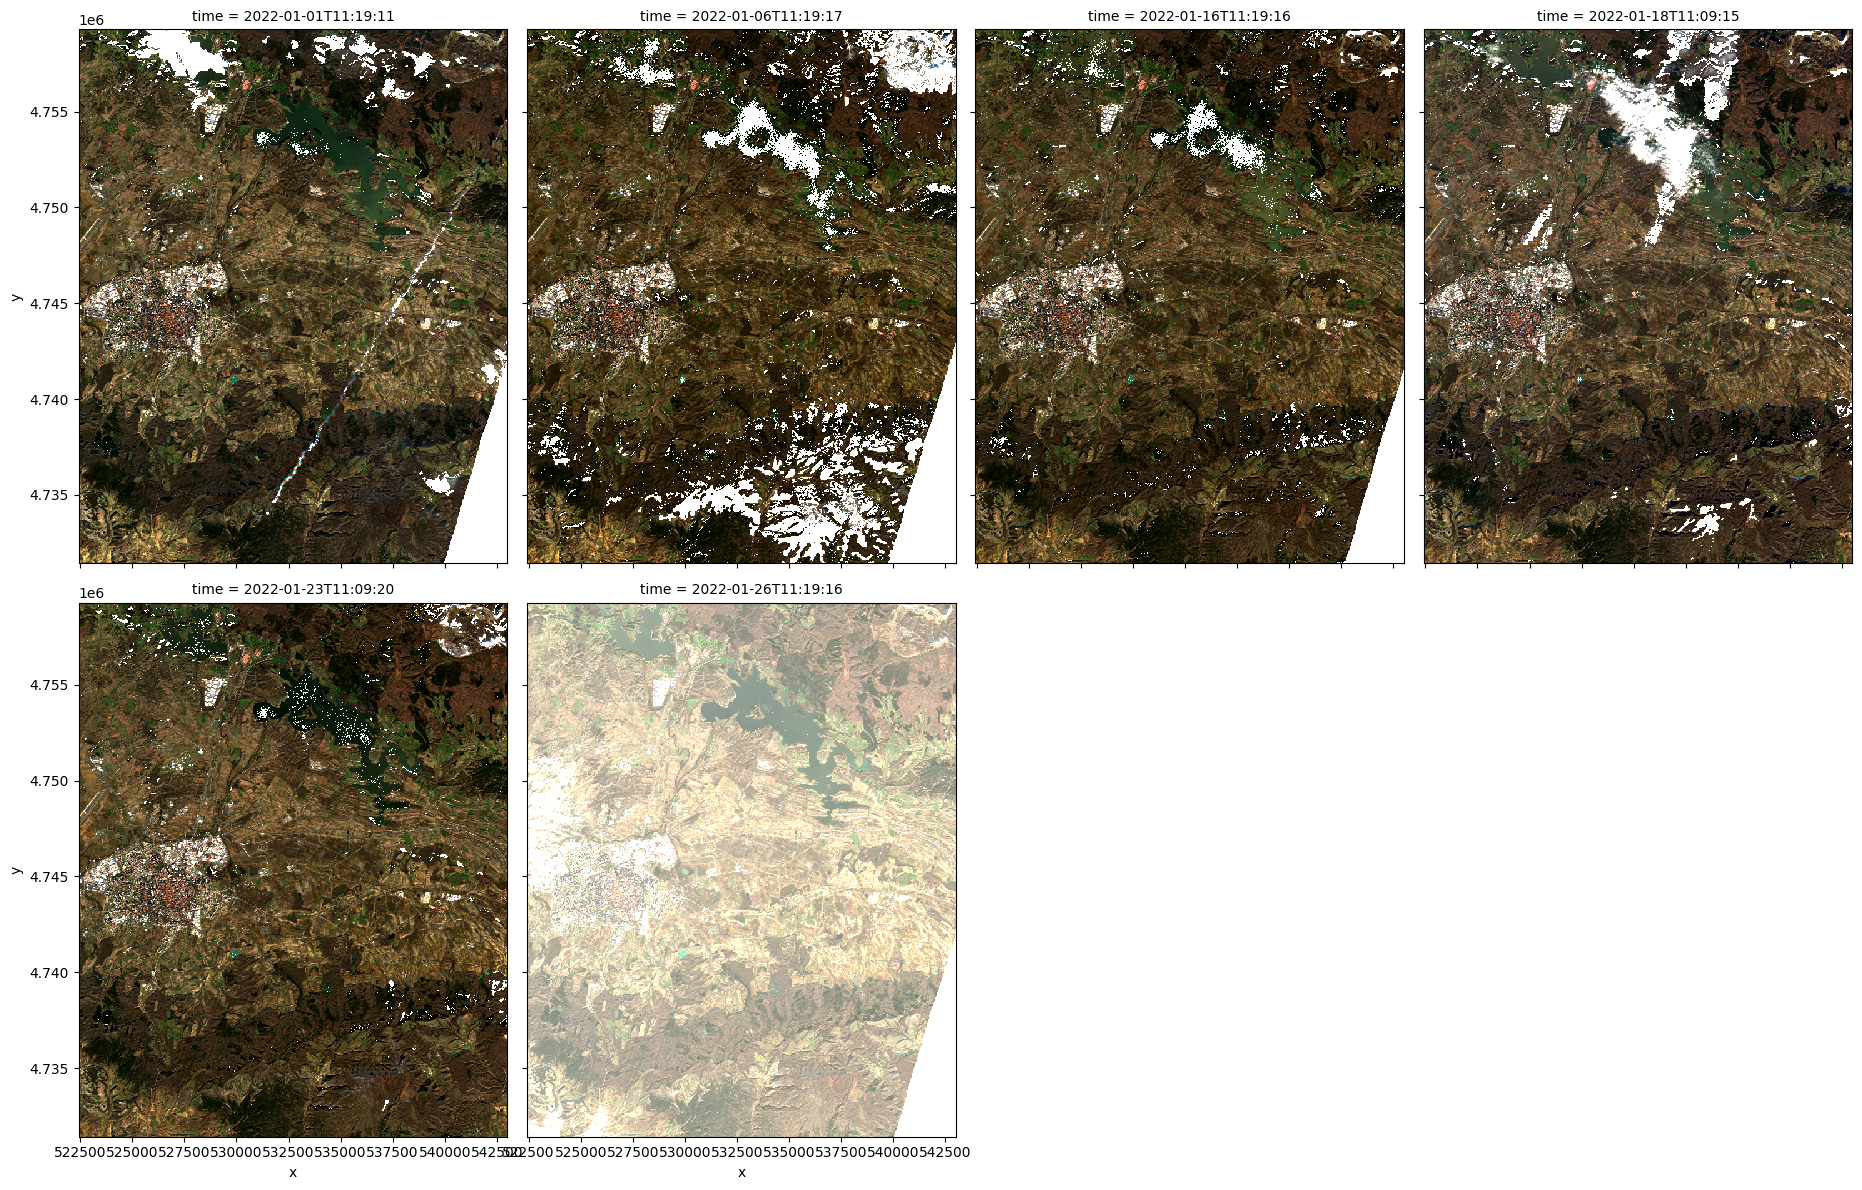

In [5]:
# Plot as an RGB image
rgb(ds, col='time')

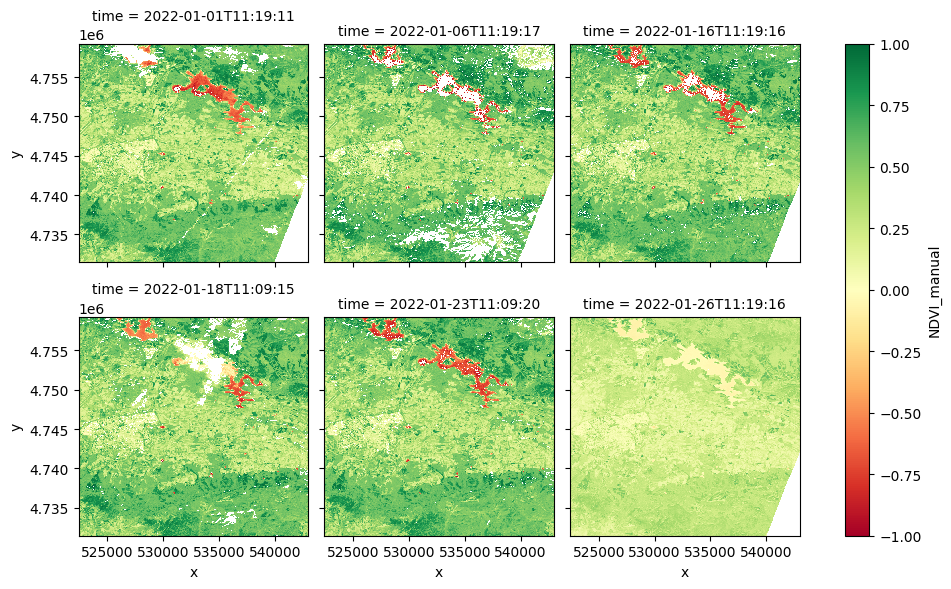

In [9]:
# Calculate NDVI using the formula above
ds['NDVI_manual'] = (ds.nir - ds.red) / (ds.nir + ds.red)

# Plot the results for one time step to see what they look like:
ds.NDVI_manual.plot(col='time', vmin=-1, vmax=1, cmap='RdYlGn', col_wrap=3)

In [10]:
calculate_indices(ds, index=['NDVI'], satellite_mission='s2')

<xarray.Dataset>
Dimensions:      (time: 6, y: 929, x: 686)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T11:19:11 ... 2022-01-26T11:...
  * y            (y) float64 4.759e+06 4.759e+06 ... 4.731e+06 4.731e+06
  * x            (x) float64 5.224e+05 5.225e+05 5.225e+05 ... 5.43e+05 5.43e+05
    spatial_ref  int32 32630
Data variables:
    red          (time, y, x) float32 692.0 515.0 550.0 638.0 ... nan nan nan
    green        (time, y, x) float32 578.0 502.0 581.0 610.0 ... nan nan nan
    blue         (time, y, x) float32 427.0 301.0 299.0 342.0 ... nan nan nan
    swir_1       (time, y, x) float32 2.038e+03 2.009e+03 2.282e+03 ... nan nan
    swir_2       (time, y, x) float32 1.362e+03 1.186e+03 1.352e+03 ... nan nan
    nir          (time, y, x) float32 1.636e+03 2.112e+03 2.836e+03 ... nan nan
    nir_2        (time, y, x) float32 1.758e+03 2.159e+03 3.048e+03 ... nan nan
    NDVI_manual  (time, y, x) float32 0.4055 0.6079 0.6751 ... nan nan nan
    NDVI         (time, y, x) float32 0.4055 0.6079 0.6751 ... nan nan nan
Attributes:
    crs:           epsg:32630
    grid_mapping:  spatial_ref

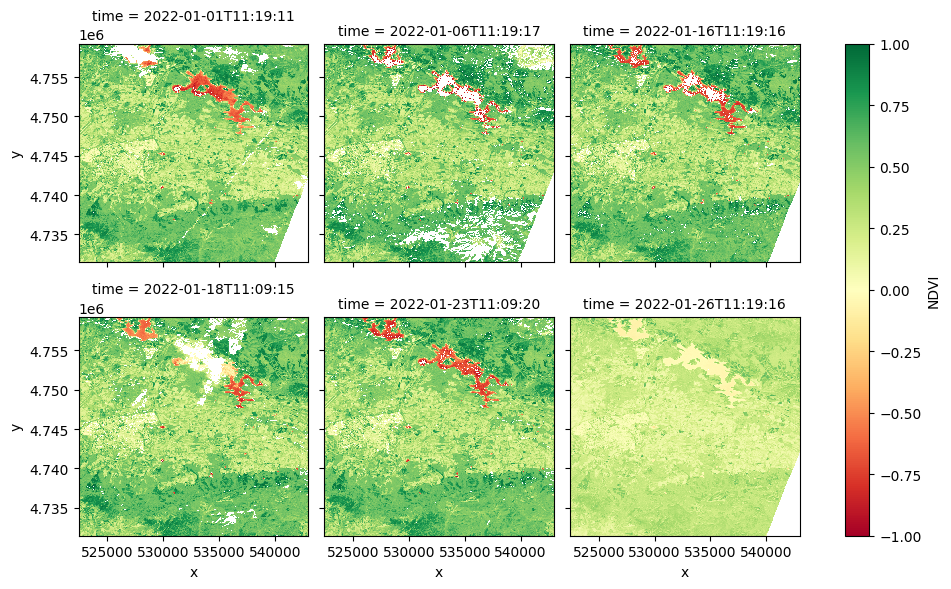

In [11]:
# Calculate NDVI using `calculate indices`
ds_ndvi = calculate_indices(ds, index='NDVI', satellite_mission='s2')

# Plot the results 
ds_ndvi.NDVI.plot(col='time', vmin=-1, vmax=1, cmap='RdYlGn', col_wrap=3)

In [12]:
# Calculate multiple indices
ds_multi = calculate_indices(ds, index=['NDVI', 'NDWI', 'MNDWI'], satellite_mission='s2')

print(ds_multi)

<xarray.Dataset>
Dimensions:      (time: 6, y: 929, x: 686)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T11:19:11 ... 2022-01-26T11:...
  * y            (y) float64 4.759e+06 4.759e+06 ... 4.731e+06 4.731e+06
  * x            (x) float64 5.224e+05 5.225e+05 5.225e+05 ... 5.43e+05 5.43e+05
    spatial_ref  int32 32630
Data variables:
    red          (time, y, x) float32 692.0 515.0 550.0 638.0 ... nan nan nan
    green        (time, y, x) float32 578.0 502.0 581.0 610.0 ... nan nan nan
    blue         (time, y, x) float32 427.0 301.0 299.0 342.0 ... nan nan nan
    swir_1       (time, y, x) float32 2.038e+03 2.009e+03 2.282e+03 ... nan nan
    swir_2       (time, y, x) float32 1.362e+03 1.186e+03 1.352e+03 ... nan nan
    nir          (time, y, x) float32 1.636e+03 2.112e+03 2.836e+03 ... nan nan
    nir_2        (time, y, x) float32 1.758e+03 2.159e+03 3.048e+03 ... nan nan
    NDVI_manual  (time, y, x) float32 0.4055 0.6079 0.6751 ... nan nan nan
    NDVI         (

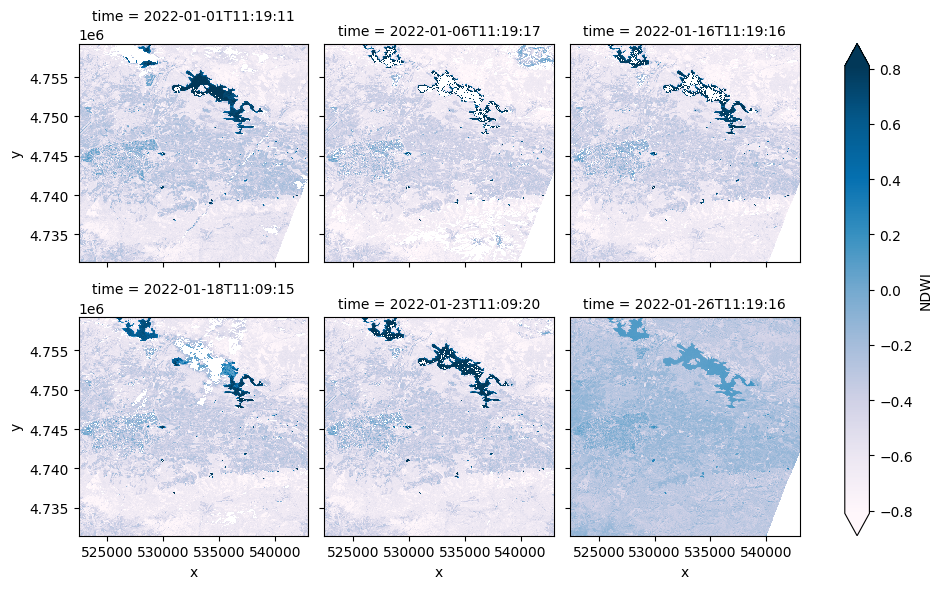

In [14]:
# Plot the NDWI results 
ds_multi.NDWI.plot(col='time', robust=True, cmap='PuBu', col_wrap=3)

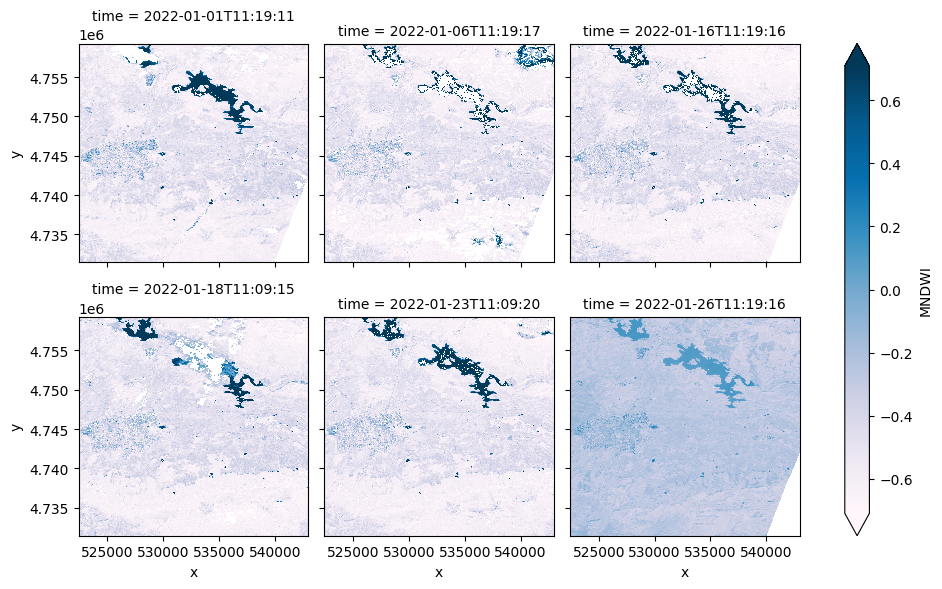

In [15]:
# Plot the MNDWI results 
ds_multi.MNDWI.plot(col='time', robust=True, cmap='PuBu', col_wrap=3)

In [16]:
# Calculate multiple indices and drop original bands
ds_drop = calculate_indices(ds, index=['NDVI', 'NDWI', 'MNDWI'], drop=True, satellite_mission='s2')
print(ds_drop)

Dropping bands ['red', 'green', 'blue', 'swir_1', 'swir_2', 'nir', 'nir_2', 'NDVI_manual']
<xarray.Dataset>
Dimensions:      (time: 6, y: 929, x: 686)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01T11:19:11 ... 2022-01-26T11:...
  * y            (y) float64 4.759e+06 4.759e+06 ... 4.731e+06 4.731e+06
  * x            (x) float64 5.224e+05 5.225e+05 5.225e+05 ... 5.43e+05 5.43e+05
    spatial_ref  int32 32630
Data variables:
    NDVI         (time, y, x) float32 0.4055 0.6079 0.6751 ... nan nan nan
    NDWI         (time, y, x) float32 -0.4779 -0.6159 -0.6599 ... nan nan nan
    MNDWI        (time, y, x) float32 -0.5581 -0.6002 -0.5941 ... nan nan nan
Attributes:
    crs:           epsg:32630
    grid_mapping:  spatial_ref
